In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = 'C:/Users/KRIPASAGAR CHAUDHARI/Downloads/archive (2)/data/co2-ppm-daily.csv'

In [ ]:
#creating a data frame

CO2_emission = pd.read_csv(data)

CO2_emission.head()


,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [ ]:
#Ensure a date is converted to datetime type and  sorted
CO2_emission['date']=pd.to_datetime(CO2_emission['date'])
CO2_emission['date']

0       1958-03-30
1       1958-03-31
2       1958-04-02
3       1958-04-03
4       1958-04-04
           ...    
18759   2017-12-27
18760   2017-12-28
18761   2017-12-29
18762   2017-12-30
18763   2017-12-31
Name: date, Length: 18764, dtype: datetime64[ns]

In [ ]:
CO2_emission.sort_values('date', inplace=True)


In [ ]:
# Identify x and y axis

In [ ]:
x_data = CO2_emission['date']
x_data

0       1958-03-30
1       1958-03-31
2       1958-04-02
3       1958-04-03
4       1958-04-04
           ...    
18759   2017-12-27
18760   2017-12-28
18761   2017-12-29
18762   2017-12-30
18763   2017-12-31
Name: date, Length: 18764, dtype: datetime64[ns]

In [ ]:
y_data = CO2_emission['value']
y_data

0        316.16
1        316.40
2        317.67
3        317.76
4        317.09
          ...  
18759    406.88
18760    408.26
18761    407.53
18762    407.30
18763    407.01
Name: value, Length: 18764, dtype: float64

In [ ]:
# Convert dates to a numerical format for fitting (e.g., days since start)
CO2_emission['Time'] = (CO2_emission['date'] - CO2_emission['date'].min()).dt.days

In [ ]:
CO2_emission['Time'] 

0            0
1            1
2            3
3            4
4            5
         ...  
18759    21822
18760    21823
18761    21824
18762    21825
18763    21826
Name: Time, Length: 18764, dtype: int64

In [ ]:
x_neumerical = CO2_emission['Time']


In [ ]:
x_neumerical

0            0
1            1
2            3
3            4
4            5
         ...  
18759    21822
18760    21823
18761    21824
18762    21825
18763    21826
Name: Time, Length: 18764, dtype: int64

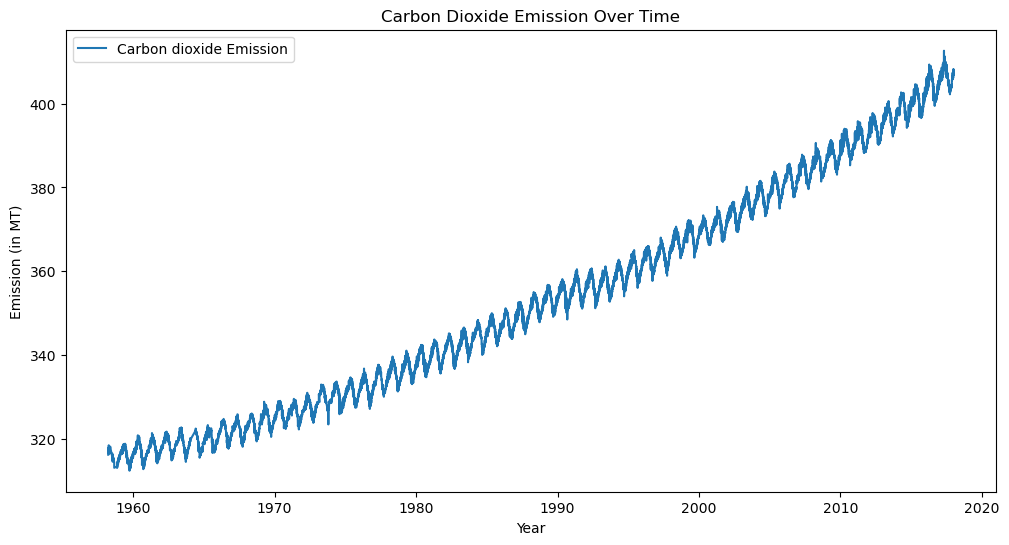

In [ ]:
# Plot the time series to visualize the data
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label='Carbon dioxide Emission')
plt.title('Carbon Dioxide Emission Over Time')
plt.xlabel('Year')
plt.ylabel("Emission (in MT)")
plt.legend()
plt.show()


In [ ]:
# Define the model for the modified exponential curve
def mod_exp_func(t, a, b, c):
    return a * np.exp(b * t) + c


In [ ]:
# Predicting initial guess values of Constants

# Initial guess for 'a'
a_guess = y_data[0]
a_guess

316.16

In [ ]:
# Calculate the middle index and the corresponding guess for 'b'
if len(x_data) % 2 == 0:  # If even number of elements
    central_index = len(x_data) // 2 - 1  # Use the lower middle index
    centre_value_of_x = x_data[central_index]
else:  # If odd number of elements
    central_index = len(x_data) // 2
    centre_value_of_x = x_data[central_index]


In [ ]:
# Since the value of x is Pandas.TimeStamp, extracting year for predicting value of b
    
timestamp_obj = pd.Timestamp(centre_value_of_x)
b_guess = 1/ timestamp_obj.year


In [ ]:
timestamp_obj

Timestamp('1990-01-25 00:00:00')

In [ ]:
b_guess

0.0005025125628140704

In [ ]:
# Initial guess for 'c'
c_guess =y_data[0]

print(f"Initial Guess values of constants a, b, and c are {a_guess:.2f}, {b_guess:.4f}, {c_guess:.2f} respectively.")


Initial Guess values of constants a, b, and c are 316.16, 0.0005, 316.16 respectively.


In [ ]:
c_guess

316.16

In [ ]:
# Fit the model to the data
p0 = (a_guess, b_guess, c_guess)
popt, pcov = curve_fit(mod_exp_func, x_neumerical, y_data, p0=p0, maxfev = 8000)

In [ ]:
popt, pcov

(array([5.84012376e+01, 4.37880459e-05, 2.55202355e+02]),
 array([[ 2.29881234e-01, -1.10734991e-07, -2.48958123e-01],
        [-1.10734991e-07,  5.36711372e-14,  1.19498011e-07],
        [-2.48958123e-01,  1.19498011e-07,  2.70451946e-01]]))

In [ ]:
p0

(316.16, 0.0005025125628140704, 316.16)

In [ ]:
# Identifying optimal values of parameters
print(f"Optimized values of constants a, b, and c for best fit are", popt,  "respectively.")

Optimized values of constants a, b, and c for best fit are [5.84012376e+01 4.37880459e-05 2.55202355e+02] respectively.


In [ ]:
# Identify covariance matrix for estimating "error" of the paramters a,b and c

print("Covariance matrix of the parameters a, b and c is:\n", pcov)


Covariance matrix of the parameters a, b and c is:
 [[ 2.29881234e-01 -1.10734991e-07 -2.48958123e-01]
 [-1.10734991e-07  5.36711372e-14  1.19498011e-07]
 [-2.48958123e-01  1.19498011e-07  2.70451946e-01]]


<Axes: >

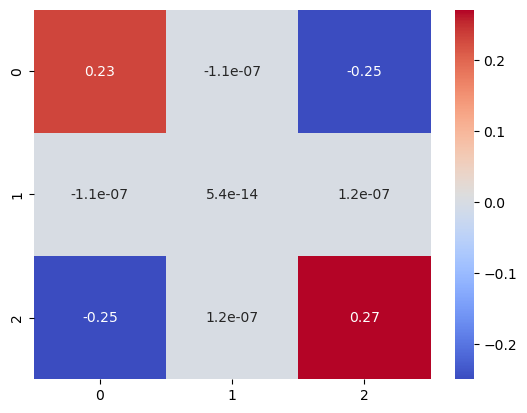

In [ ]:
sns.heatmap(pcov, cmap='coolwarm', annot=True)


In [ ]:
# Use the optimized parameters to plot the fitted curve
y_pred = mod_exp_func(x_neumerical, *popt)


In [ ]:
y_pred

0        313.603593
1        313.606150
2        313.611265
3        313.613823
4        313.616381
            ...    
18759    407.050324
18760    407.056974
18761    407.063623
18762    407.070273
18763    407.076923
Name: Time, Length: 18764, dtype: float64

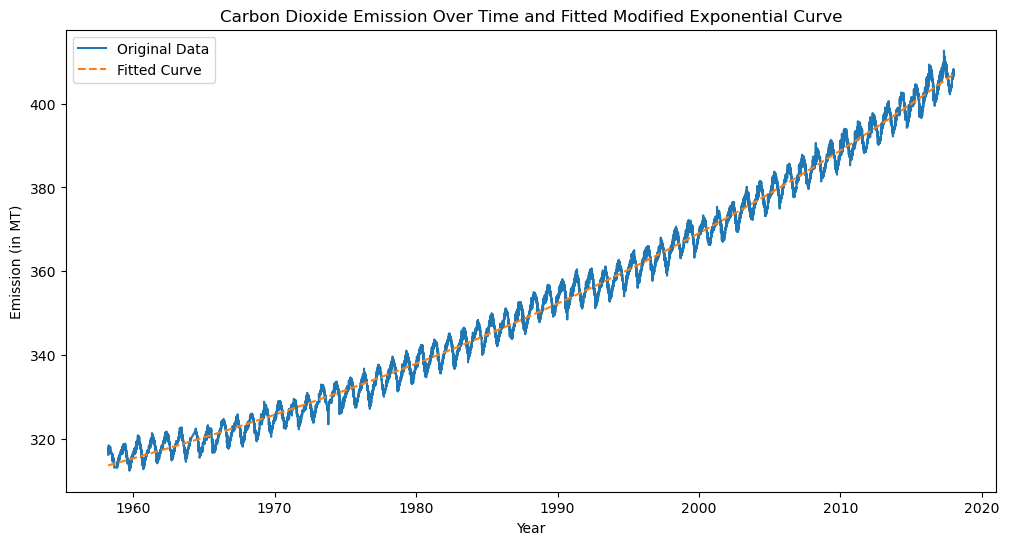

In [ ]:
# Plotting the original data and the fitted curve
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_pred, '--', label='Fitted Curve')
plt.title('Carbon Dioxide Emission Over Time and Fitted Modified Exponential Curve')
plt.xlabel('Year')
plt.ylabel('Emission (in MT)')
plt.legend()
plt.show()


In [ ]:
# Calculate R^2
r_squared = r2_score(y_data, y_pred)
print("Coefficient of Determination = " ,r_squared)


Coefficient of Determination =  0.992296463718203


In [ ]:
Interpretation:
This covariance matrix is a critical statistical tool in understanding the uncertainty in the estimated parameters of the model fit.
The diagonal elements of the covariance matrix provide the variances of the individual parameter estimates. The square root of these diagonal values gives the standard deviation of each parameter estimate. This standard deviation is an indicator of the uncertainty of the parameter estimates; smaller values generally suggest more precise estimates. In present case, the parameters a, b and c has low variance. This means the model's estimation of these parameters are precise and reliable, suggesting that the true parameter value is likely to be close to the estimated value.
The off-diagonal elements of the covariance matrix represent the covariances between different parameter estimates. These values tell us how much the parameter estimates co-vary. A positive value indicates that as one parameter increases, the other tends to increase too. Conversely, a negative value suggests that as one parameter increases, the other tends to decrease.In present case, parameter a weak negative covariance with b and c. Likewise, b has a weak covariance with a and c.


SyntaxError: unterminated string literal (detected at line 3) (4128138957.py, line 3)

In [ ]:
#practical 2

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df="C:/Users/KRIPASAGAR CHAUDHARI/Desktop/SHWETA/Time series analytics/taq-cat-t-jan042010.txt"

In [ ]:
stock_price = pd.read_csv(df)

In [ ]:
stock_price.columns